In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## -- Importando CSVs e Entendendo os Datasets --


In [3]:
df_questions = pd.read_csv("../archive/Stress_Dataset.csv")
df_questions.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


OBS: Na descrição do Dataset acima é citado que as perguntas foram feitas variando de 1 a 5 pontos, usando uma escala de "Not at all" até "Extremely".

In [4]:
df_stress_levels = pd.read_csv("../archive/StressLevelDataset.csv")
df_stress_levels.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


OBS2: Já para este dataset, não foi informada a escala exata de como cada informação foi medida, mas ele informa que elas foram agrupadas em 5 fatores científicos:

🧠 Psychological Factors

    anxiety_level
    self_esteem
    mental_health_history
    depression

🏥 Physiological Factors

    headache
    blood_pressure
    sleep_quality
    breathing_problem

🌆 Environmental Factors

    noise_level
    living_conditions
    safety
    basic_needs

🎓 Academic Factors

    academic_performance
    study_load
    teacher_student_relationship
    future_career_concerns

🤝 Social Factors

    social_support
    peer_pressure
    extracurricular_activities
    bullying


## -- Analisando colunas de potenciais variáveis chave --

Primeiro estou buscando uma variável que possa ser usada como medida para todo o restante do dataset, ou sua maioria, uma comparação principal para quebrar o dataset em grupos e fazer análises específicas em cima desses grupos

In [5]:
questions_column = df_questions.columns
questions_column

Index(['Gender', 'Age', 'Have you recently experienced stress in your life?',
       'Have you noticed a rapid heartbeat or palpitations?',
       'Have you been dealing with anxiety or tension recently?',
       'Do you face any sleep problems or difficulties falling asleep?',
       'Have you been dealing with anxiety or tension recently?.1',
       'Have you been getting headaches more often than usual?',
       'Do you get irritated easily?',
       'Do you have trouble concentrating on your academic tasks?',
       'Have you been feeling sadness or low mood?',
       'Have you been experiencing any illness or health issues?',
       'Do you often feel lonely or isolated?',
       'Do you feel overwhelmed with your academic workload?',
       'Are you in competition with your peers, and does it affect you?',
       'Do you find that your relationship often causes you stress?',
       'Are you facing any difficulties with your professors or instructors?',
       'Is your working env

In [6]:
df_questions["Have you recently experienced stress in your life?"].value_counts()

Have you recently experienced stress in your life?
3    263
2    219
4    193
5     90
1     78
Name: count, dtype: int64

Percebe-se que quando questionados sobre o estresse que têm experienciado na vida atualmente, os estudantes responderam mais aproximadamente a níveis moderados de estresse. Seria interessante fazer uma análise dentro de cada grupo de nível de estresse.

In [7]:
stress_type = (
    df_questions["Which type of stress do you primarily experience?"]
    .value_counts()
    .reset_index(name="count")
)
stress_type

,Which type of stress do you primarily experience?,count
0,Eustress (Positive Stress) - Stress that motiv...,768
1,No Stress - Currently experiencing minimal to ...,43
2,Distress (Negative Stress) - Stress that cause...,32


In [8]:
stress_type["percent"] = (
    (stress_type["count"] / stress_type["count"].sum()) * 100
).round(2)
stress_type

,Which type of stress do you primarily experience?,count,percent
0,Eustress (Positive Stress) - Stress that motiv...,768,91.1
1,No Stress - Currently experiencing minimal to ...,43,5.1
2,Distress (Negative Stress) - Stress that cause...,32,3.8


### Estranhamente, a maioria dos estudantes diz sentir um estresse ***"positivo"***, relatando que ganham motivação e performance.

In [9]:
stress_level_columns = df_stress_levels.columns
stress_level_columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [10]:
df_stress_levels[
    [
        "anxiety_level",
        "self_esteem",
        "mental_health_history",
        "depression",
        "stress_level",
    ]
].describe().apply(lambda x: round(x, 2))

,anxiety_level,self_esteem,mental_health_history,depression,stress_level
count,1100.00,1100.00,1100.00,1100.00,1100.00
mean,11.06,17.78,0.49,12.56,1.00
std,6.12,8.94,0.50,7.73,0.82
min,0.00,0.00,0.00,0.00,0.00
25%,6.00,11.00,0.00,6.00,0.00
50%,11.00,19.00,0.00,12.00,1.00
75%,16.00,26.00,1.00,19.00,2.00
max,21.00,30.00,1.00,27.00,2.00


### > **Valores Estranhos**

Percebi que as colunas possuem valores estranhos, com escalas e variações diferentes. Felizmente, após entrar na aba de [discussões](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/discussion/598633) do dataset ficou mais claro como os valores foram medidos.

- ``stress_level``: Varia de 0 a 2, representando *'no stress', 'normal/moderate stress' e 'high stress'*
- ``mental_health_history``: Binário que indica se o estudante já teve (`1`), ou não (`0`) algum problema com doenças mentais no passado.
- ``depression``: Valores de uma pontuação baseada em um PHQ-9 (Patient Health Questionnaire-9), um questionário rápido e validado para rastrear a depressão e avaliar a sua gravidade. Quanto maiores, mais graves.
- `anxiety_level` e `self_esteem`: aparentam seguir a mesma lógica que o anterior, quanto maior, mais grave o caso.

In [11]:
df_stress_levels["stress_level"].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

Após analisar as colunas, percebi que a coluna de ``'stress_level'`` mede os níveis de estresse dos estudantes entre 0 e 2. Anlisando o desvio padrão em relação à média, percebe-se que pela proximidade dos valores, a dispersão nos níveis de estresse é muito grande, confirmado pelo ``value_counts()``, o que é bom para analisar diferentes grupos.



### > Portanto, decidi utilizar as respostas da pergunta ``'Have you recently experienced stress in your life?'`` como minha variável chave para análises no `df_questions`

### > Além disso, também utilizarei a variável de `"stress_level"` como principal comparativo no ``df_stress_levels``

Assim, podemos quebrar o dataset em 5 grupos de diferentes intensidades de estresse e avaliar como campos diferentes se relacionam com cada um deles.

Então, abaixo começo a fazer algumas análises.

## -- **1. Análise de Performance Acadêmica e Hábitos de Estudo em relação aos níveis de Estresse** --

A principal pergunta a ser respondida aqui é: como o nível de estresse impacta na dedicação e resultados acadêmicos do estudante? Percebemos mais cedo que a maioria dos estudantes diz que sente um estresse positivo, o qual os motiva e melhora sua performance, mas será que é isso mesmo que está acontecendo?

In [12]:
## Selecionando colunas relacionadas à performance acadêmica de ambos os dataframes para realizar análises

df_performance_questions = df_questions[
    [
        "Do you lack confidence in your choice of academic subjects?",
        "Do you attend classes regularly?",
        "Do you lack confidence in your academic performance?",
        "Have you recently experienced stress in your life?",
    ]
]

Decidi começar comparando as variáveis categóricas do ``df_performance_questions``

In [13]:
## Usando um dicionário para criar um resultado com melhor legibilidade
frequencia_dict = {
    1: "Not_at_All",
    2: "Rarely",
    3: "Sometimes",
    4: "Frequently",
    5: "Extremely",
}

result = df_performance_questions[
    [
        "Do you lack confidence in your choice of academic subjects?",
        "Do you attend classes regularly?",
        "Do you lack confidence in your academic performance?",
        "Have you recently experienced stress in your life?",
    ]
].copy()

## Aplicando o dicionário
result = result.apply(lambda col: col.map(frequencia_dict))

## Ordenando para a ordem correta
categorical_order = list(frequencia_dict.values())
result = result.apply(
    lambda col: pd.Categorical(col, categories=categorical_order, ordered=True)
)

## Separando em grupos
grouped_class_frequency = (
    result.groupby(
        [
            "Do you attend classes regularly?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Ammount")
)

# Análises para cada grupo
grouped_subject_confidance = (
    result.groupby(
        [
            "Do you lack confidence in your choice of academic subjects?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Ammount")
)


grouped_academic_confidance = (
    result.groupby(
        [
            "Do you lack confidence in your academic performance?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Ammount")
)

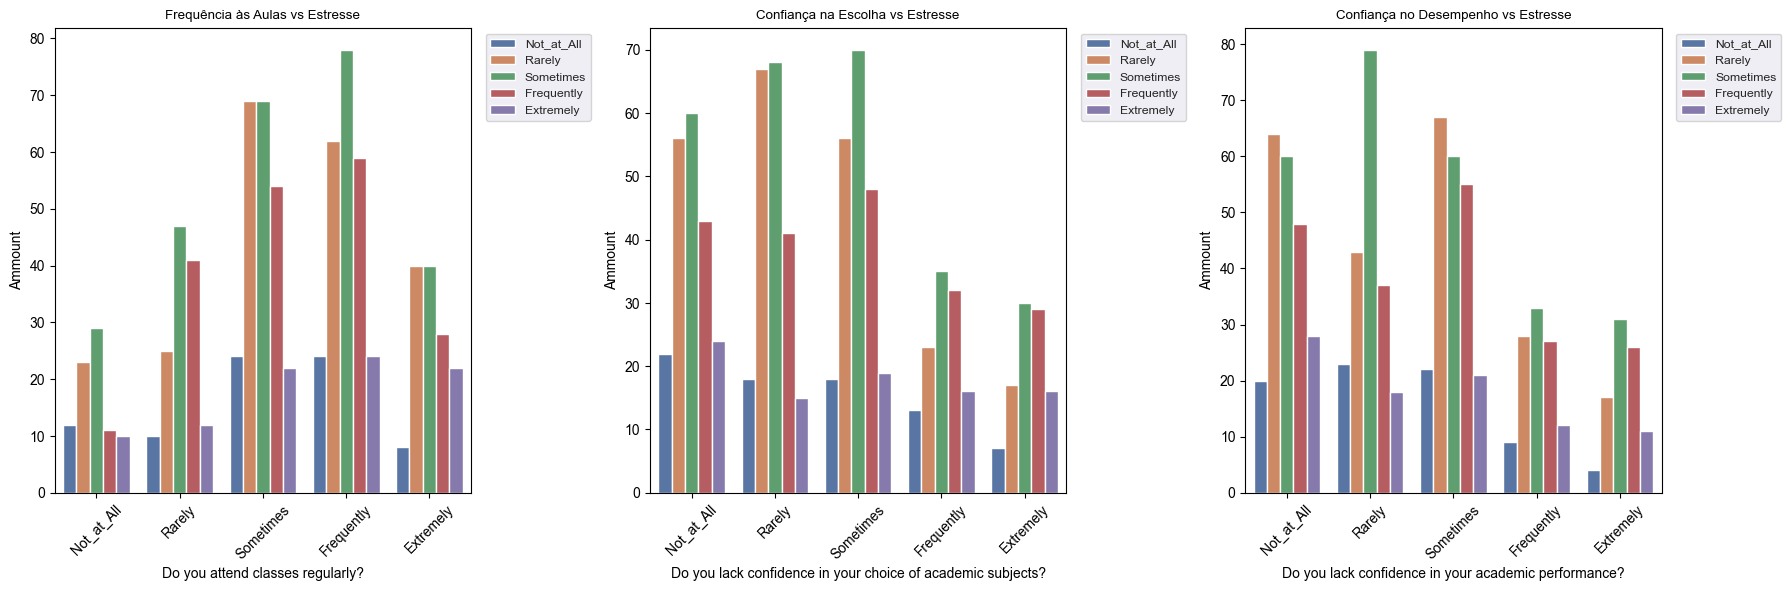

In [14]:
## Com tudo finalmente agrupado, vamos plotar isso
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.set_theme(font_scale=0.8)

# Subplot 1: Frequência às aulas
sns.barplot(
    data=grouped_class_frequency,
    x="Do you attend classes regularly?",
    y="Ammount",
    hue="Have you recently experienced stress in your life?",
    ax=axes[0],
)
axes[0].set_title("Frequência às Aulas vs Estresse")

# Subplot 2: Confiança na escolha de matérias
sns.barplot(
    data=grouped_subject_confidance,
    x="Do you lack confidence in your choice of academic subjects?",
    y="Ammount",
    hue="Have you recently experienced stress in your life?",
    ax=axes[1],
)
axes[1].set_title("Confiança na Escolha vs Estresse")

# Subplot 3: Confiança no desempenho acadêmico
sns.barplot(
    data=grouped_academic_confidance,
    x="Do you lack confidence in your academic performance?",
    y="Ammount",
    hue="Have you recently experienced stress in your life?",
    ax=axes[2],
)
axes[2].set_title("Confiança no Desempenho vs Estresse")

for ax in axes:
    ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

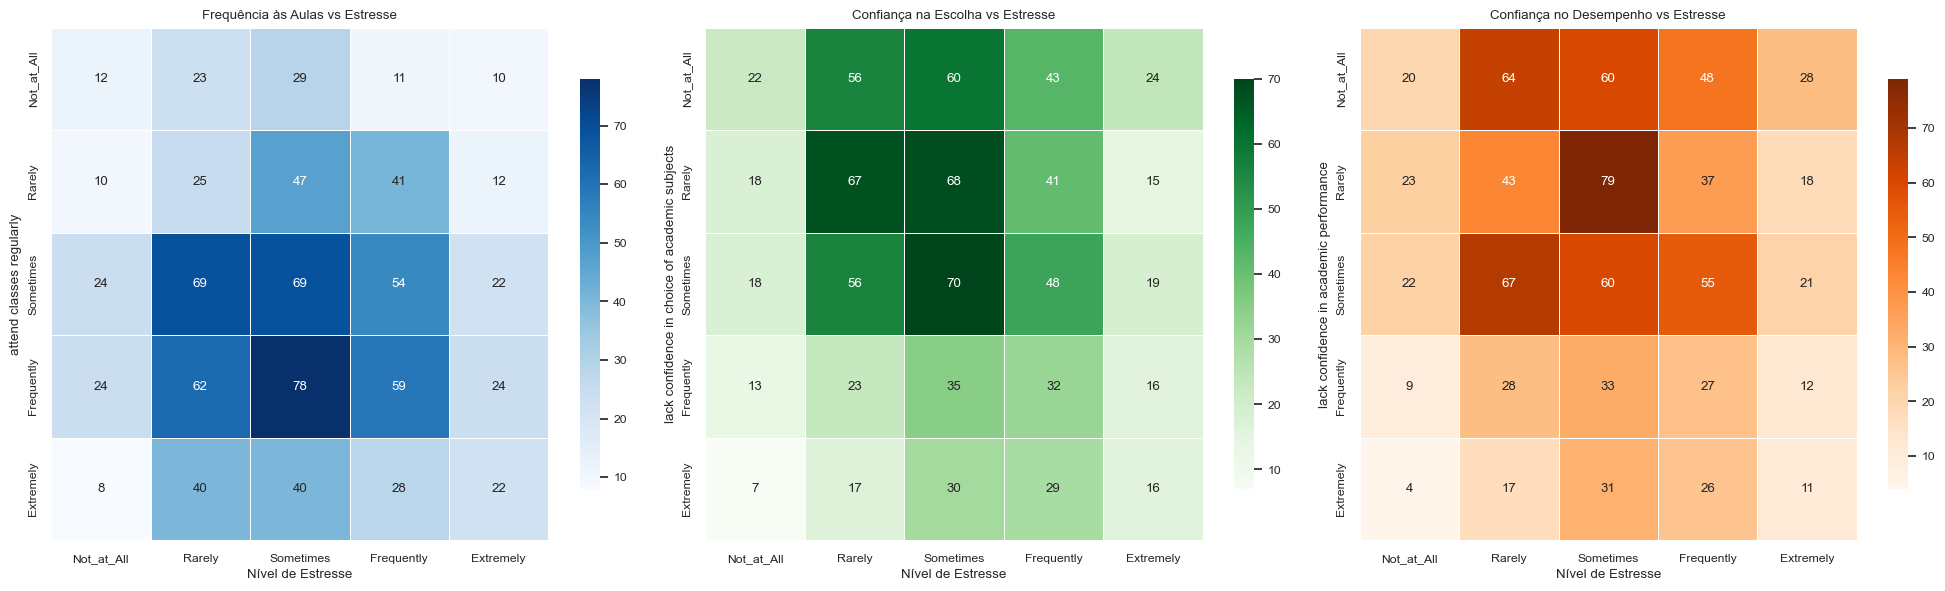

In [15]:
# Plotagens alternativas

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_theme(font_scale=0.8)

# Heatmap 1: Frequência às Aulas
pivot_table1 = grouped_class_frequency.pivot(
    index="Do you attend classes regularly?",
    columns="Have you recently experienced stress in your life?",
    values="Ammount",
).fillna(0)

sns.heatmap(
    pivot_table1,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    ax=axes[0],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[0].set_title("Frequência às Aulas vs Estresse")
axes[0].set_xlabel("Nível de Estresse")
axes[0].set_ylabel("attend classes regularly")

# Heatmap 2: Confiança na Escolha de Matérias
pivot_table2 = grouped_subject_confidance.pivot(
    index="Do you lack confidence in your choice of academic subjects?",
    columns="Have you recently experienced stress in your life?",
    values="Ammount",
).fillna(0)

sns.heatmap(
    pivot_table2,
    annot=True,
    fmt=".0f",
    cmap="Greens",
    ax=axes[1],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[1].set_title("Confiança na Escolha vs Estresse")
axes[1].set_xlabel("Nível de Estresse")
axes[1].set_ylabel("lack confidence in choice of academic subjects")

# Heatmap 3: Confiança no Desempenho Acadêmico
pivot_table3 = grouped_academic_confidance.pivot(
    index="Do you lack confidence in your academic performance?",
    columns="Have you recently experienced stress in your life?",
    values="Ammount",
).fillna(0)

sns.heatmap(
    pivot_table3,
    annot=True,
    fmt=".0f",
    cmap="Oranges",
    ax=axes[2],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[2].set_title("Confiança no Desempenho vs Estresse")
axes[2].set_xlabel("Nível de Estresse")
axes[2].set_ylabel("lack confidence in academic performance")

plt.tight_layout()
plt.show()

### Observações após as plotagens:

Como esperado de pesquisas assim, a maioria das pessoas se mantém concentrada no valor central *Sometimes*.

- **Frequência às Aulas vs Estresse**: A maior parte do estresse se concentra naqueles que comparecem às aulas com uma frequência mediana. A sua intensidade aparenta ser moderada. Também, há uma quantidade significativa de pessoas que possuem frequências média-baixa (*Sometimes e Rarely*) que sentem um estresse de grau 4 (*Frequently*), assim como o inverso também é verdade, há grandes quantidades de pessoas que apresentam baixo estresse (*Rarely*) e a mesma frequência média-baixa. **Conclusão:** aparentemente a frequência não parece ser um fator muito influenciado pelo estresse, na verdade, observando o gráfico de barras, o caso aparenta ser o inverso disso, percebendo-se que conforme a presença do indivíduo aumenta, seu nível de estresse também parece aumentar, até chegar na frequência mais alta possível, onde há uma queda significativa nos níveis de estresse como um todo. Curiosamente, os alunos com frequências ruins sentem menos estresse do que aqueles sempre presentes.

- **Confiança na Escolha vs Estresse**: Impressionantemente, os alunos parecem mais estressados quanto **menos** dúvidas nas suas escolhas de curso! Uma relação completamente inversa ao esperado. **Conclusão e Hipóteses:** o fato de que a maioria dos estudantes marcou opções como *Rarely* e *Sometimes* quando questionados quanto às suas certezas pode demonstrar que haja uma dúvida interna maior do que adimitem, mas não é possível afirmar. O que se percebe é que aqueles com mais dúvida, parecem sentir menos estresse. Por fim, percebemos pouca variação na quantidade de estudantes que sentem estresses frequentemente, independente de sua confiança em suas escolhas acadêmicas, mostrando que para um nível de estresse um pouco mais elevado do que a média, talvez já não haja influência das dúvidas no seu estresse, pois há apenas uma pequena queda. Se há uma influência no estresse nas dúvidas, seria nos níveis médios de estresse, talvez demonstrando uma autosabotagem dos próprios alunos.    

- **Confiança no Desempenho vs Estresse**: Inversamente ao esperado, assim como na análise acima, estudantes com grande falta de confiança em seus desempenhos acadêmicos parecem não ter uma diferença muito grande em seus níveis de estresse entre si, mas quando os comparamos àqueles que são mais confiantes em seu desempenho, a quantidade de pessoas com graus médio-baixo, médio e médio-alto de estresse aumenta. Há um destaque evidente para estresses medianos em pessoas que raramente duvidam de seu desempenho acadêmico. **Conclusão e Hipótese**: a confiança no desempenho não parece ter uma influência no nível de estresse muito significativa, mas aqueles que possuem, mais confiança estão mais propensos a sentirem estresses medianos e médio-baixos, enquanto os com menos confiança podem variar entr os níveis de estresse. Surpreendentemente, o caso mais comum é o estudante ter dúvidas com média-baixa frequência quanto à sua performance, resultando em estresses moderados.

Tendo em mente que os estudantes desta pesquisa relataram, em sua maioria (91%, demonstrado no início desta análise), que o estresse que sentem é ***"positivo"***,  podemos talvez ver isso como verdade, até então, tendo em vista que os níveis de estresse mais predominantes foram os médio-baixo e médio e que fatores como a presença em sala de aula e a confiança no desempenho acadêmico não parecem ter uma relação de consequência com o estresse. Porém, não devemos descartar que há uma quantidade considerável de estudantes na pesquisa que tiveram estresses elevados, marcando sua presença ao longo das plotagens, mas nunca sendo a maioria. São necessárias mais análises, envolvendo estes subgrupos ou outros para encontrar possíveis causas mais concretas.

- Após as análises, tentarei inverter a abordagem. Inicialmente, fui guiado pelo senso de que o estresse impacta nas atividades acadêmicas, não o inverso. 
### Talvez, a universidade seja uma das causa do estresse experienciado.  

In [16]:
## Seleção de colunas para a análise

df_academic_impact = df_questions[
    [
        "Do you feel overwhelmed with your academic workload?",
        "Are you facing any difficulties with your professors or instructors?",
        "Academic and extracurricular activities conflicting for you?",
        "Do you struggle to find time for relaxation and leisure activities?",
        "Have you recently experienced stress in your life?",
    ]
].copy()

In [17]:
# Dicionário de frequência, já foi criado mas o declaro novamente por precauções com o kernel do Jupyter

frequencia_dict = {
    1: "Not_at_All",
    2: "Rarely",
    3: "Sometimes",
    4: "Frequently",
    5: "Extremely",
}

result_academic = df_academic_impact.copy()
for column in result_academic.columns:
    result_academic[column] = result_academic[column].map(frequencia_dict)

# Categorizando os dados, assim como fizemos antriormente para que fiquem corretamente ordenados.
ordem_categorica = list(frequencia_dict.values())
for column in result_academic.columns:
    result_academic[column] = pd.Categorical(
        result_academic[column], categories=ordem_categorica, ordered=True
    )

# Análises para cada grupo
grouped_workload = (
    result_academic.groupby(
        [
            "Do you feel overwhelmed with your academic workload?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Amount")
)

grouped_professors = (
    result_academic.groupby(
        [
            "Are you facing any difficulties with your professors or instructors?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Amount")
)

grouped_conflicts = (
    result_academic.groupby(
        [
            "Academic and extracurricular activities conflicting for you?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Amount")
)

grouped_leisure = (
    result_academic.groupby(
        [
            "Do you struggle to find time for relaxation and leisure activities?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Amount")
)


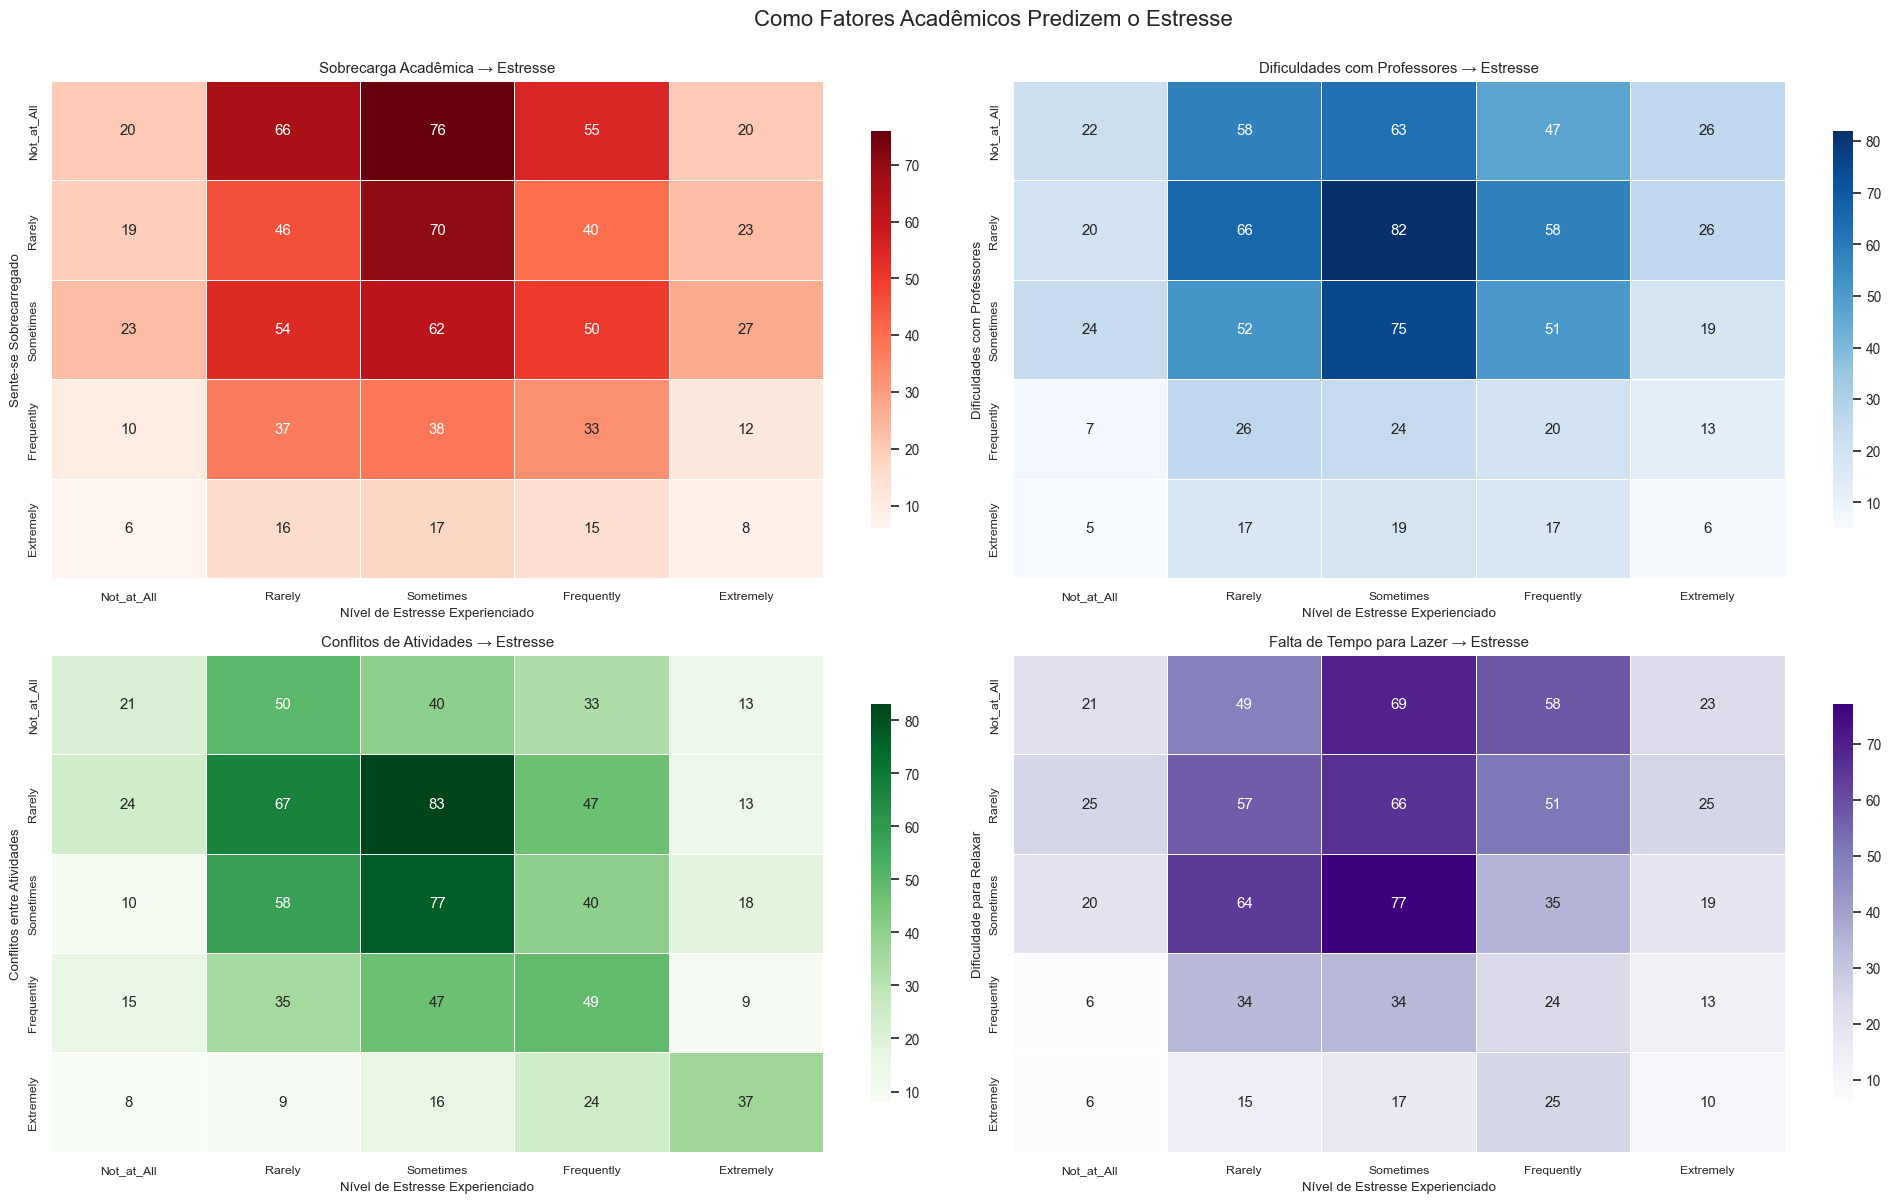

In [18]:
# Para as plotagens, seguirei com os mesmos tipos utilizados anteriormente, pois permitem visualizar claramente como os grupos interagem entre si

# VISUALIZAÇÃO 1: Heatmaps mostrando como cada fator acadêmico prediz estresse
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
sns.set_theme(font_scale=0.9)

# Heatmap 1: Sobrecarga acadêmica → Estresse
pivot_workload = grouped_workload.pivot(
    index="Do you feel overwhelmed with your academic workload?",
    columns="Have you recently experienced stress in your life?",
    values="Amount",
).fillna(0)

sns.heatmap(
    pivot_workload,
    annot=True,
    fmt=".0f",
    cmap="Reds",
    ax=axes[0, 0],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[0, 0].set_title("Sobrecarga Acadêmica → Estresse")
axes[0, 0].set_xlabel("Nível de Estresse Experienciado")
axes[0, 0].set_ylabel("Sente-se Sobrecarregado")

# Heatmap 2: Dificuldades com professores → Estresse
pivot_professors = grouped_professors.pivot(
    index="Are you facing any difficulties with your professors or instructors?",
    columns="Have you recently experienced stress in your life?",
    values="Amount",
).fillna(0)

sns.heatmap(
    pivot_professors,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    ax=axes[0, 1],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[0, 1].set_title("Dificuldades com Professores → Estresse")
axes[0, 1].set_xlabel("Nível de Estresse Experienciado")
axes[0, 1].set_ylabel("Dificuldades com Professores")

# Heatmap 3: Conflitos de atividades → Estresse
pivot_conflicts = grouped_conflicts.pivot(
    index="Academic and extracurricular activities conflicting for you?",
    columns="Have you recently experienced stress in your life?",
    values="Amount",
).fillna(0)

sns.heatmap(
    pivot_conflicts,
    annot=True,
    fmt=".0f",
    cmap="Greens",
    ax=axes[1, 0],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[1, 0].set_title("Conflitos de Atividades → Estresse")
axes[1, 0].set_xlabel("Nível de Estresse Experienciado")
axes[1, 0].set_ylabel("Conflitos entre Atividades")

# Heatmap 4: Falta de tempo para lazer → Estresse
pivot_leisure = grouped_leisure.pivot(
    index="Do you struggle to find time for relaxation and leisure activities?",
    columns="Have you recently experienced stress in your life?",
    values="Amount",
).fillna(0)

sns.heatmap(
    pivot_leisure,
    annot=True,
    fmt=".0f",
    cmap="Purples",
    ax=axes[1, 1],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[1, 1].set_title("Falta de Tempo para Lazer → Estresse")
axes[1, 1].set_xlabel("Nível de Estresse Experienciado")
axes[1, 1].set_ylabel("Dificuldade para Relaxar")

plt.suptitle("Como Fatores Acadêmicos Predizem o Estresse", fontsize=16, y=1)
plt.tight_layout()
plt.show()

### Observações após as plotagens:

Mais uma vez, percebe-se que a maior parte dos respondentes concentra-se em torno do centro dos heatmaps.

- **Sobrecarga Acadêmica → Estresse**: Percebe-se que os alunos menos sobrecarregados parecem ter estresses moderados em sua maioria, com alguns menos e outros um pouco mais estressados do que outros. Seria interessante se pudéssemos fazer uma análise quanto aos cursos e semestres dentro de alguns grupos do heatmap, buscando encontrar os possíveis cursos e semestres mais ou menos estressantes e que causam mais sobrecarga, entretanto, o data set mantém os respondentes anônimos, então não é possível ter acesso à essa informação. **Conclusão** Já que não há quantidades muito significativas nas bordas de estresse, não é possível afirmar com certeza o impacto da sobrecarga acadêmica no estresse. Esse impacto certamente existe, mas não é a maioria e, tendo em vista que o comportamento dos níveis de estresse parece se manter o mesmo até para aqueles que se sentem sobrecarregados, a sobrecarga não parece tão decisiva para o nível de estresse.

- **Dificuldades com Professores → Estresse**: De cara, vemos que é significativamente maior a parcela de alunos que possuem poucas dificuldades com professores. Nesse sentido, o comportamento dos níveis de estress também não parece afetado pelas dificuldades com os professores, seguindo um padrão já familiar para nós. **Conclusão**: provavelmente, ter dificuldades com professores e agentes da instituição não é um fator decisivo no nível de estresse.

- **Conflitos de Atividades → Estresse**: O conflito de atividades parece ter uma influência maior que as outras variáveis no estresse, evidente pelo crescimento repentino em alunos com altos níveis de estresse que também experienciam conflitos de atividades e, além disso, pelo fato do estresse ser moderado ou baixo para a maioria dos que não têm tantos conflitos assim. Ainda há uma parcela significativa de alunos com estresses em níveis frequentes que se sentem sobrecarregados, mas isso tammbém é válido para baixas sobrecargas. **Conclusão**: Para os níveis mais altos de estresse, o conflito entre atividades extracurriculares e atividades acadêmicas parece ser um fator importante na causa desse estresse.

- **Falta de Tempo para Lazer → Estresse**: Assim como a dificuldade com os professores, a falta de tempo para lazer não parece ser significativa na causa do estresse. **Conclusão**: A maioria dos estudantes não parece sentir falta de tempo para exercer suas atividades de lazer, com a maioria possuindo níveis medianos de estresse.

### Por fim, decidi calcular algumas proporções e correlações:

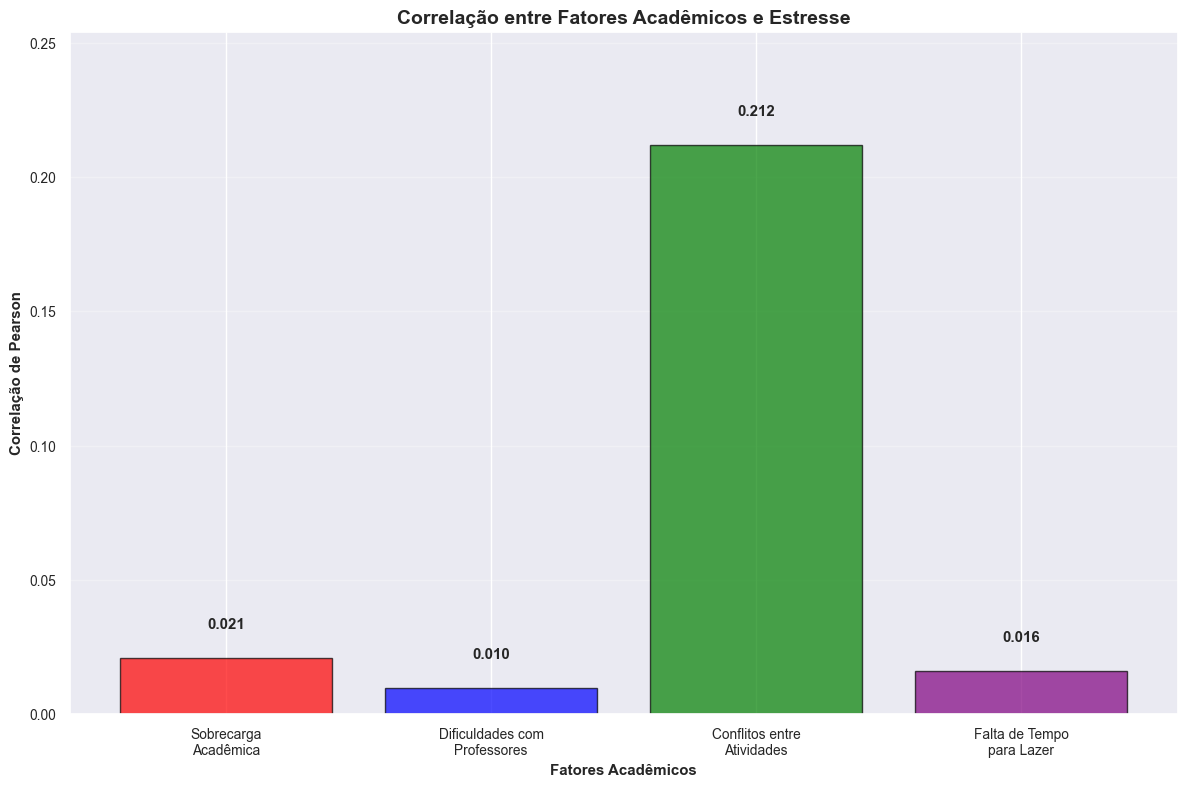


=== ANÁLISE DE PROPORÇÕES ===
% de estudantes com ALTO estresse (4-5) que também têm ALTO nível em cada fator acadêmico:

Do you feel overwhelmed with your academic workload?
 > 24.0% dos estudantes com alto estresse

Are you facing any difficulties with your professors or instructors?
 > 19.8% dos estudantes com alto estresse

Academic and extracurricular activities conflicting for you?
 > 42.0% dos estudantes com alto estresse

Do you struggle to find time for relaxation and leisure activities?
 > 25.4% dos estudantes com alto estresse



In [19]:
# Para comprovar a influência de conflitos de atividades decidi calcular algumas correlações de pearson entre as colunas.

correlations = {}
academic_factors = [
    "Do you feel overwhelmed with your academic workload?",
    "Are you facing any difficulties with your professors or instructors?",
    "Academic and extracurricular activities conflicting for you?",
    "Do you struggle to find time for relaxation and leisure activities?",
]

for factor in academic_factors:
    corr = df_academic_impact[factor].corr(
        df_academic_impact["Have you recently experienced stress in your life?"]
    )
    correlations[factor] = corr

# Plotando
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Preparar dados para o gráfico de correlações
factor_names = [
    "Sobrecarga\nAcadêmica",
    "Dificuldades com\nProfessores",
    "Conflitos entre\nAtividades",
    "Falta de Tempo\npara Lazer",
]
corr_values = list(correlations.values())

bars = ax.bar(
    factor_names,
    corr_values,
    color=["red", "blue", "green", "purple"],
    alpha=0.7,
    edgecolor="black",
    linewidth=1,
)

for bar, value in zip(bars, corr_values):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.01,
        f"{value:.3f}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

ax.set_title(
    "Correlação entre Fatores Acadêmicos e Estresse", fontsize=14, fontweight="bold"
)
ax.set_ylabel("Correlação de Pearson", fontweight="bold")
ax.set_xlabel("Fatores Acadêmicos", fontweight="bold")
ax.grid(axis="y", alpha=0.3)
ax.set_ylim(0, max(corr_values) * 1.2)

plt.tight_layout()
plt.show()

# Por fim, uma análise de algumas proporções
print("\n=== ANÁLISE DE PROPORÇÕES ===")
print(
    "% de estudantes com ALTO estresse (4-5) que também têm ALTO nível em cada fator acadêmico:\n"
)

high_stress_students = df_academic_impact[
    df_academic_impact["Have you recently experienced stress in your life?"] >= 4
]
total_high_stress = len(high_stress_students)

for factor in academic_factors:
    high_factor_stress = len(high_stress_students[high_stress_students[factor] >= 4])
    percentage = (high_factor_stress / total_high_stress) * 100
    print(f"{factor}")
    print(f" > {percentage:.1f}% dos estudantes com alto estresse")
    print()

- A partir das proporções e correlações, conseguimos comprovar as observações feitas anteriormente de que a influência das variáveis  ``"Are you facing any difficulties with your professors or instructors?"`` e ``"Do you struggle to find time for relaxation and leisure activities?"`` no estresse dos alunos é muito baixa. A sobrecarga acadêmica também é um fator quase descartável, mas os valores da coluna de conflito entre atividades possui uma correlação decente, apesar de ainda um pouco distante do ideal.

- Por fim, com a análise de proporcionalidade, fica evidente que uma parcela significativa dos estudantes que passam por mais estresse sofre com o conflito de atividades. Ou seja, podemos afirmar com maior certeza que há uma relação de causalidade entre eles, não se sabe com certeza qual causa qual, mas devido aos argumentos já apresentados, acredito que o conflito cause o estresse e não o contrário.

## -- **2. Análise de saúde mental dos estudantes estressados** --

O objetivo dessa análise é focar no dataset `df_stress_levels`, buscando entender como as condições como a depressão e a ansiedade impacta no estresse e nas condições mentais dos estudantes.

Dessa vez decidi analisar as correlações entre os valores antes de mais nada, para tentar ter um "norte" antes de começar as análises

In [20]:
df_mental_health = df_stress_levels[
    [
        "anxiety_level",
        "self_esteem",
        "mental_health_history",
        "depression",
        "stress_level",
    ]
].copy()

# Criando uma matriz de correlações
matrix_corr = df_mental_health[
    [
        "anxiety_level",
        "self_esteem",
        "mental_health_history",
        "depression",
        "stress_level",
    ]
].corr()

stress_correlations = (
    matrix_corr["stress_level"].drop("stress_level").sort_values(ascending=False)
)


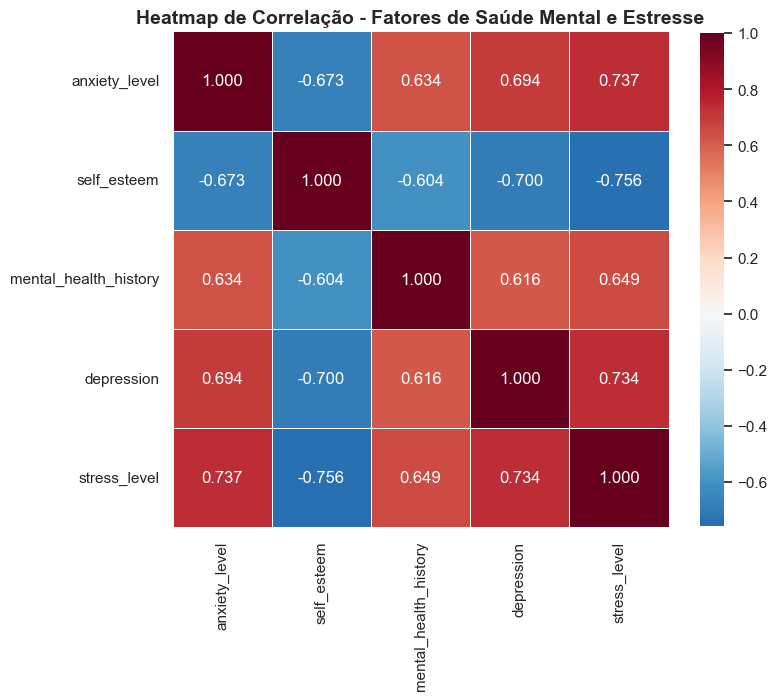

In [21]:
# Plotando as correlações
sns.set_theme(style="whitegrid", font_scale=1.0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

correlation_matrix = df_mental_health[
    [
        "anxiety_level",
        "self_esteem",
        "mental_health_history",
        "depression",
        "stress_level",
    ]
].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    center=0,
    ax=ax,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
    square=True,
)

ax.set_title(
    "Heatmap de Correlação - Fatores de Saúde Mental e Estresse",
    fontweight="bold",
    fontsize=14,
)
plt.show()

Com o heatmap fica evidente como cada coluna se relaciona entre si, mas principalmente que possuem grande impacto no nível de estresse, obviamente com comportamentos inversos para `self_esteem`.

In [22]:
# ============= CATEGORIZAÇÃO DOS DADOS =============

# Dicionários para facilitar a leitura dos dados
stress_dict = {0: "No_Stress", 1: "Normal/Moderate", 2: "High Stress"}

mental_history_dict = {0: "No History", 1: "Has History"}

df_mental_health["stress_category"] = df_mental_health["stress_level"].map(stress_dict)
df_mental_health["mental_history_label"] = df_mental_health[
    "mental_health_history"
].map(mental_history_dict)

# Calculando e tratando os valores em um formato de percentuais para podermos categorizá-los em baixo, médio e alto.
depression_values = df_mental_health["depression"].dropna().sort_values().values
total = len(depression_values)
percent_33 = int(total * 0.33)
percent_67 = int(total * 0.67)
depression_percents = [
    depression_values[percent_33],
    depression_values[percent_67],
]

anxiety_values = df_mental_health["anxiety_level"].dropna().sort_values().values
total = len(anxiety_values)
percent_33 = int(total * 0.33)
percent_67 = int(total * 0.67)
anxiety_percents = [
    anxiety_values[percent_33],
    anxiety_values[percent_67],
]

self_esteem_values = df_mental_health["self_esteem"].dropna().sort_values().values
total = len(self_esteem_values)
percent_33 = int(total * 0.33)
percent_67 = int(total * 0.67)
esteem_percents = [self_esteem_values[percent_33], self_esteem_values[percent_67]]


# Função para categorizar os valores de depressão, ansiedade
def categorize_severity(value, ranges):
    if value < ranges[0]:
        return "Low"
    elif value < ranges[1]:
        return "Moderate"
    else:
        return "High"


# Aplicando
df_mental_health["depression_category"] = df_mental_health["depression"].apply(
    lambda x: categorize_severity(x, depression_percents)
)
df_mental_health["anxiety_category"] = df_mental_health["anxiety_level"].apply(
    lambda x: categorize_severity(x, anxiety_percents)
)
df_mental_health["esteem_category"] = df_mental_health["self_esteem"].apply(
    lambda x: categorize_severity(x, self_esteem_values)
)

Agora, podemos analisar as proporções de cada variável em relação ao estresse

In [23]:
print("========== ANÁLISE DE PROPORÇÕES ==========")
print("\n=== DISTRIBUIÇÃO DE ESTRESSE POR CATEGORIA ===\n")
stress_distribution = df_mental_health["stress_category"].value_counts()
for category, count in stress_distribution.items():
    percent = (count / len(df_mental_health)) * 100
    print(f"{category}: {count} estudantes ({percent:.2f}%)")

intensity_arr = ["Low", "Moderate", "High"]

# DEPRESSÃO -> ESTRESSE
for depression_level in intensity_arr:
    col = df_mental_health[df_mental_health["depression_category"] == depression_level]

    if len(col) == 0:
        continue

    print(f"\nEstudantes com depressão {depression_level}:")
    stress_dist = col["stress_category"].value_counts()

    for stress_cat, count in stress_dist.items():
        percent = (count / len(col)) * 100
        print(f"  -> {stress_cat}: {percent:.2f}%")

# ANSIEDADE -> ESTRESSE
for anxiety_level in intensity_arr:
    col = df_mental_health[df_mental_health["anxiety_category"] == anxiety_level]

    if len(col) == 0:
        continue

    print(f"\nEstudantes com ansiedade {anxiety_level}:")
    stress_dist = col["stress_category"].value_counts()

    for stress_cat, count in stress_dist.items():
        percent = (count / len(col)) * 100
        print(f"  -> {stress_cat}: {percent:.2f}%")

# HISTÓRICO DE SAÚDE MENTAL -> ESTRESSE
for history_status in ["No History", "Has History"]:
    col = df_mental_health[df_mental_health["mental_history_label"] == history_status]

    if len(col) == 0:
        continue

    print(f"\nEstudantes {history_status}:")
    stress_dist = col["stress_category"].value_counts()

    for stress_cat, count in stress_dist.items():
        percent = (count / len(col)) * 100
        print(f"  -> {stress_cat}: {percent:.2f}%")

# AUTOESTIMA -> ESTRESSE
for esteem_level in intensity_arr:
    col = df_mental_health[df_mental_health["esteem_category"] == esteem_level]

    if len(col) == 0:
        continue

    print(f"\nEstudantes com autoestima {esteem_level}:")
    stress_dist = col["stress_category"].value_counts()

    for stress_cat, count in stress_dist.items():
        percent = (count / len(col)) * 100
        print(f"  -> {stress_cat}: {percent:.2f}%")

# DEPRESSÃO + ANSIEDADE
high_depression_anxiety = df_mental_health[
    (df_mental_health["depression_category"] == "High")
    & (df_mental_health["anxiety_category"] == "High")
]
low_depression_anxiety = df_mental_health[
    (df_mental_health["depression_category"] == "Low")
    & (df_mental_health["anxiety_category"] == "Low")
]

print(
    f"\nEstudantes com ALTA depressão + ALTA ansiedade: {len(high_depression_anxiety)}"
)
if len(high_depression_anxiety) > 0:
    high_stress_pct = (
        (high_depression_anxiety["stress_level"] == 2).sum()
        / len(high_depression_anxiety)
        * 100
    )
    print(f"  -> {high_stress_pct:.2f}% têm estresse alto")

print(
    f"\nEstudantes com BAIXA depressão + BAIXA ansiedade: {len(low_depression_anxiety)}"
)
if len(low_depression_anxiety) > 0:
    high_stress_pct = (
        (low_depression_anxiety["stress_level"] == 2).sum()
        / len(low_depression_anxiety)
        * 100
    )
    print(f"  -> {high_stress_pct:.2f}% têm estresse alto")

========== ANÁLISE DE PROPORÇÕES ==========

=== DISTRIBUIÇÃO DE ESTRESSE POR CATEGORIA ===

No_Stress: 373 estudantes (33.91%)
High Stress: 369 estudantes (33.55%)
Normal/Moderate: 358 estudantes (32.55%)

Estudantes com depressão Low:
  -> No_Stress: 86.83%
  -> Normal/Moderate: 6.58%
  -> High Stress: 6.58%

Estudantes com depressão Moderate:
  -> Normal/Moderate: 75.91%
  -> No_Stress: 15.09%
  -> High Stress: 9.00%

Estudantes com depressão High:
  -> High Stress: 84.05%
  -> No_Stress: 9.19%
  -> Normal/Moderate: 6.76%

Estudantes com ansiedade Low:
  -> No_Stress: 84.93%
  -> High Stress: 9.28%
  -> Normal/Moderate: 5.80%

Estudantes com ansiedade Moderate:
  -> Normal/Moderate: 79.07%
  -> No_Stress: 15.99%
  -> High Stress: 4.94%

Estudantes com ansiedade High:
  -> High Stress: 77.86%
  -> Normal/Moderate: 16.06%
  -> No_Stress: 6.08%

Estudantes No History:
  -> No_Stress: 60.04%
  -> Normal/Moderate: 32.80%
  -> High Stress: 7.17%

Estudantes Has History:
  -> High Stress: 

Tudo isso fica mais fácil de analisar com alguns gráficos:

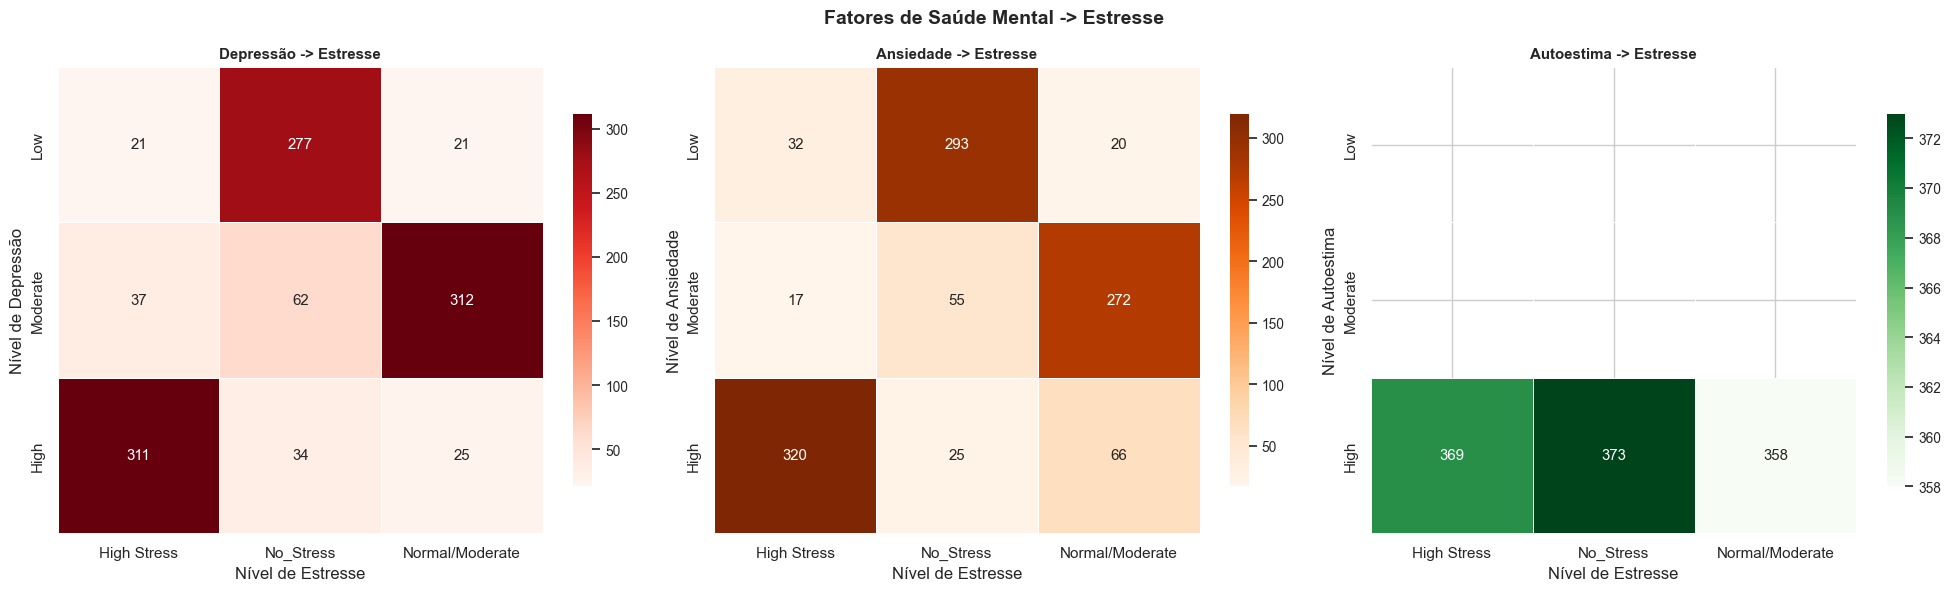

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_theme(style="whitegrid", font_scale=0.9)

############################## Heatmap 1: Depressão -> Estresse ##############################
grouped_depression = (
    df_mental_health.groupby(["depression_category", "stress_category"], observed=True)
    .size()
    .reset_index(name="count")
)
pivot_depression = grouped_depression.pivot(
    index="depression_category", columns="stress_category", values="count"
).fillna(0)
pivot_depression = pivot_depression.reindex(["Low", "Moderate", "High"])

sns.heatmap(
    pivot_depression,
    annot=True,
    fmt=".0f",
    cmap="Reds",
    ax=axes[0],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[0].set_title("Depressão -> Estresse", fontweight="bold")
axes[0].set_xlabel("Nível de Estresse")
axes[0].set_ylabel("Nível de Depressão")

############################## Heatmap 2: Ansiedade -> Estresse ##############################
grouped_anxiety = (
    df_mental_health.groupby(["anxiety_category", "stress_category"], observed=True)
    .size()
    .reset_index(name="count")
)
pivot_anxiety = grouped_anxiety.pivot(
    index="anxiety_category", columns="stress_category", values="count"
).fillna(0)
pivot_anxiety = pivot_anxiety.reindex(["Low", "Moderate", "High"])

sns.heatmap(
    pivot_anxiety,
    annot=True,
    fmt=".0f",
    cmap="Oranges",
    ax=axes[1],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[1].set_title("Ansiedade -> Estresse", fontweight="bold")
axes[1].set_xlabel("Nível de Estresse")
axes[1].set_ylabel("Nível de Ansiedade")

############################## Heatmap 3: Autoestima -> Estresse ##############################
grouped_esteem = (
    df_mental_health.groupby(["esteem_category", "stress_category"], observed=True)
    .size()
    .reset_index(name="count")
)
pivot_esteem = grouped_esteem.pivot(
    index="esteem_category", columns="stress_category", values="count"
).fillna(0)
pivot_esteem = pivot_esteem.reindex(["Low", "Moderate", "High"])

sns.heatmap(
    pivot_esteem,
    annot=True,
    fmt=".0f",
    cmap="Greens",
    ax=axes[2],
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
axes[2].set_title("Autoestima -> Estresse", fontweight="bold")
axes[2].set_xlabel("Nível de Estresse")
axes[2].set_ylabel("Nível de Autoestima")

plt.suptitle("Fatores de Saúde Mental -> Estresse", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

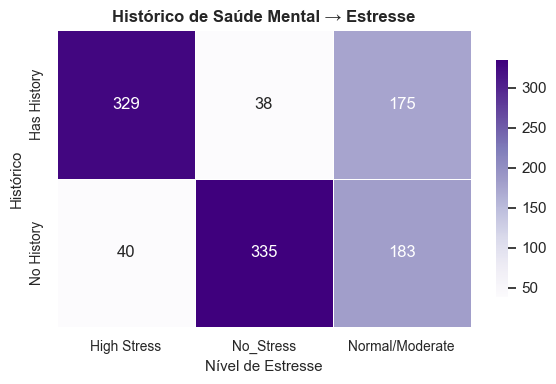

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.set_theme(style="whitegrid", font_scale=1.0)

grouped_history = (
    df_mental_health.groupby(["mental_history_label", "stress_category"], observed=True)
    .size()
    .reset_index(name="count")
)
pivot_history = grouped_history.pivot(
    index="mental_history_label", columns="stress_category", values="count"
).fillna(0)

sns.heatmap(
    pivot_history,
    annot=True,
    fmt=".0f",
    cmap="Purples",
    ax=ax,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
)
ax.set_title("Histórico de Saúde Mental → Estresse", fontweight="bold", fontsize=12)
ax.set_xlabel("Nível de Estresse")
ax.set_ylabel("Histórico")

plt.tight_layout()
plt.show()

### Observações acerca dos Fatores de Saúde Mental vs. Estresse

Os heatmaps revelam conexões profundas e diretas entre a saúde mental dos estudantes e os seus níveis de estresse, como esperado, oferecendo uma visão mais clara sobre os fatores que acompanham os quadros de estresse elevado.

- **Níveis de Depressão vs Estresse**: A relação entre os sintomas depressivos e o estresse é visualmente clara e direta. A concentração de estudantes no cruzamento entre ``High Stress`` e ``High Depression`` (311 estudantes) é enorme, tornando evidente que estes dois fatores estão associados. Em contraste a isso, estudantes com baixa depressão ("Low") se acumulam predominantemente nas categorias de ``No_Stress`` (277) e ``Normal/Moderate`` (312), com uma presença quase nula em ``High Stress`` (21). Os valores para depressão moderada acompanham essa tendência, servindo como uma ponte entre os dois extremos. **Conclusão**: Existe uma correlação positiva e fortíssima entre a gravidade dos sintomas de depressão e o nível de estresse percebido. É altamente provável que essas condições tenham uma espécie de simbiose, com a depressão podendo reduzir a capacidade do estudante de lidar com as demandas, gerando mais estresse, enquanto o estresse crônico é um conhecido gatilho para transtornos depressivos. Para este subgrupo, o estresse claramente não é "positivo".

- **Níveis de Ansiedade vs. Estresse**: De forma muito semelhante à depressão, a ansiedade demonstra uma conexão direta e poderosa com o estresse. O gráfico é quase um espelho do anterior, com a maior concentração de alunos ocorrendo no cruzamento de ``High Anxiety`` e ``High Stress`` (320 estudantes). **Conclusão**: Ansiedade e estresse caminham lado a lado no dataset. A sobreposição é tão significativa que sugere que, para muitos estudantes, estas duas experiências são quase indiferentes uma da outra. Um estado de estresse elevado está quase sempre acompanhado por um alto nível de ansiedade.

- **Níveis de Autoestima vs Estresse**: Aqui, a relação se mostra um tanto contraintuitiva. Ao contrário da relação linear vista com a depressão e a ansiedade, **a autoestima não parece piorar progressivamente com o aumento do estresse**. Surpreendentemente, nenhum dos respondentes da pesquisa possui um nível de autoestima baixa, **com todos computando valores acima de 20** (sabendo que a escala utilizada para medir esta variável foi de 1 a 30 como demonstrado no início deste notebook). **Conclusão e Hipótese**: A autoestima parece ter uma relação **não-linear** com o estresse. Uma hipótese plausível é que o estresse ``Normal/Moderate`` esteja ligado a um nível saudável de desafio e engajamento acadêmico. Superar esses desafios pode, na verdade, fortalecer a autoestima do estudante. Por outro lado, a ausência total de estresse (``No_Stress``) pode estar correlacionada com apatia ou falta de engajamento, o que impactaria negativamente a autopercepção do estudante, resultando em uma autoestima mais baixa. Por fim, o estresse "High" já representaria um ponto onde a pressão excessiva começa a erodir a autoestima que talvez existisse nos níveis moderados.

- **Histórico de Saúde Mental Prévio vs Estresse Atual**: Este gráfico, por fim, revela uma das mais fortes e claras segmentações em toda a análise, funcionando quase como um espelho invertido. A influência de um histórico de saúde mental no nível de estresse atual do estudante é indubitável. Dos estudantes que possuem um histórico (``Has History``), a esmagadora maioria (329) se encontra na categoria ``High Stress``. Em forte contraste, apenas 38 indivíduos deste mesmo grupo relataram "No_Stress".`O oposto exato ocorre com aqueles sem histórico prévio (No History). A grande maioria (335) está na categoria ``No_Stress``, com um número residual (40) sentindo um estresse elevado. Também, um ponto particularmente interessante é a categoria ``Normal/Moderate``, que se mostra bastante equilibrada entre os dois grupos (175 com histórico e 183 sem histórico), indicando que o estresse moderado é uma experiência comum a muitos estudantes, independentemente de seu passado. **Conclusão e Hipótese**: O histórico de saúde mental é um precedente muito relevante do nível de estresse atual. Isso sugere que estudantes com vulnerabilidades prévias podem ter mecanismos de enfrentamento (também chamado de "coping") menos eficazes para lidar com as pressões da vida acadêmica, ou, talvez, que o próprio ambiente universitário atue como um gatilho que intensifica condições preexistentes. O equilíbrio na faixa ``Normal/Moderate`` pode representar o estresse acadêmico "padrão" que afeta a todos. No entanto, a probabilidade de esse estresse escalar para um nível pior parece ser drasticamente maior para aqueles que já enfrentaram batalhas de saúde mental no passado.

Dito isso, revisitando a ideia de que a maioria dos estudantes (91%) diz perceber seu estresse como "positivo", os dados de saúde mental pintam um quadro mais complexo e, de certa forma, até sombrio, mostrando que há impactos preocupantes do estresse na saúde mental, mas que os estudantes simplesmente aceitam isso como algo "normal". A associação esmagadora entre estresse elevado e sintomas severos de depressão e ansiedade sugere que, para o subgrupo de estudantes em ``High Stress``, a experiência está longe de ser positiva! Sendo um claro indicador de sofrimento psíquico. Enquanto **o estresse moderado pode estar ligado a fatores de crescimento pessoal**, realmente possivelmente sendo positivo (como visto na autoestima), o estresse de alta intensidade está inegavelmente conectado a condições de saúde mental adversas que precisam de atenção.

## -- **3. Análise de fatores sociais vs estresse** --

Por fim, gostaria de analisar como que os fatores sociais do `df_stress_levels` podem estar relacionados ao estresse. Sendo eles: 
- ``social_support``
- ``peer_pressure``
- ``extracurricular_activities``
- ``bullying``

In [26]:
# Entendendo as colunas
# Confirmando que os dados estão tratados
print(df_stress_levels[df_stress_levels.isna()].count())

# Analisando estatísticas
df_stress_levels[
    ["social_support", "peer_pressure", "extracurricular_activities", "bullying"]
].describe().apply(lambda x: round(x, 2))

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


,social_support,peer_pressure,extracurricular_activities,bullying
count,1100.00,1100.00,1100.00,1100.00
mean,1.88,2.73,2.77,2.62
std,1.05,1.43,1.42,1.53
min,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,1.00
50%,2.00,2.00,2.50,3.00
75%,3.00,4.00,4.00,4.00
max,3.00,5.00,5.00,5.00


In [27]:
# Preparando dados
df_social = df_stress_levels[
    [
        "social_support",
        "peer_pressure",
        "extracurricular_activities",
        "bullying",
        "stress_level",
    ]
].copy()

intensity_dict = {1: "Very Low", 2: "Low", 3: "Moderate", 4: "High", 5: "Very High"}
sup_dict = {1: "Low/No Support", 2: "Moderate Support", 3: "High Support"}

# Categorização em 5 níveis para colunas que seguem a mesma escala
df_social["peer_pressure_category"] = df_social["peer_pressure"].map(intensity_dict)
df_social["extracurricular_category"] = df_social["extracurricular_activities"].map(
    intensity_dict
)
df_social["bullying_category"] = df_social["bullying"].map(intensity_dict)

# Categorização em 3 níveis
df_social["stress_category"] = df_social["stress_level"].map(stress_dict)
df_social["social_support_category"] = df_social["social_support"].map(sup_dict)


Primeiramente, uma análise de algumas proporcionalidades:

In [28]:
print("=== DISTRIBUIÇÃO DE ESTRESSE ===\n")
stress_distribution = df_social["stress_category"].value_counts()
for category, count in stress_distribution.items():
    percent = (count / len(df_social)) * 100
    print(f"{category}: {count} estudantes ({percent:.1f}%)")

# ========== APOIO SOCIAL -> ESTRESSE ==========
print("\n=== APOIO SOCIAL COMO PRECEDENTE DE ESTRESSE ===")
for support_level in ["Low/No Support", "Moderate Support", "High Support"]:
    col = df_social[df_social["social_support_category"] == support_level]
    if len(col) == 0:
        continue

    print(f"\nEstudantes com {support_level}:")
    stress_dist = col["stress_category"].value_counts()
    for stress_cat, count in stress_dist.items():
        percent = (count / len(col)) * 100
        print(f"{stress_cat}: {percent:.1f}%")

# ========== PRESSÃO EXTERNA -> ESTRESSE ==========
print("\n=== PRESSÃO EXTERNA COMO PRECEDENTE DE ESTRESSE ===")
for pressure_level in ["Very Low", "Low", "Moderate", "High", "Very High"]:
    col = df_social[df_social["peer_pressure_category"] == pressure_level]
    if len(col) == 0:
        continue

    print(f"\nEstudantes com pressão {pressure_level}:")
    stress_dist = col["stress_category"].value_counts()
    for stress_cat, count in stress_dist.items():
        percent = (count / len(col)) * 100
        print(f"{stress_cat}: {percent:.1f}%")

# ========== ATIVIDADES EXTRACURRICULARES -> ESTRESSE ==========
print("\n=== ATIVIDADES EXTRACURRICULARES E ESTRESSE ===")
for activity_level in ["Very Low", "Low", "Moderate", "High", "Very High"]:
    col = df_social[df_social["extracurricular_category"] == activity_level]
    if len(col) == 0:
        continue

    print(f"\nEstudantes com atividades extracurriculares {activity_level}:")
    stress_dist = col["stress_category"].value_counts()
    for stress_cat, count in stress_dist.items():
        percent = (count / len(col)) * 100
        print(f"{stress_cat}: {percent:.1f}%")

# ========== BULLYING -> ESTRESSE ==========
print("\n=== BULLYING COMO PRECEDENTE DE ESTRESSE ===")
for bullying_level in ["Very Low", "Low", "Moderate", "High", "Very High"]:
    col = df_social[df_social["bullying_category"] == bullying_level]
    if len(col) == 0:
        continue

    print(f"\nEstudantes com bullying {bullying_level}:")
    stress_dist = col["stress_category"].value_counts()
    for stress_cat, count in stress_dist.items():
        percent = (count / len(col)) * 100
        print(f"{stress_cat}: {percent:.1f}%")

# ==========  BULLYING + BAIXO APOIO SOCIAL ==========
print("\n=== BULLYING + BAIXO APOIO SOCIAL ===")

high_bullying_low_support = df_social[
    (df_social["bullying"] >= 4)
    & (df_social["social_support_category"] == "Low/No Support")
]

low_bullying_high_support = df_social[
    (df_social["bullying"] <= 2)
    & (df_social["social_support_category"] == "High Support")
]

print(
    f"Estudantes com ALTO bullying + BAIXO apoio social: {len(high_bullying_low_support)}"
)

if len(high_bullying_low_support) > 0:
    high_stress_pct = (
        (high_bullying_low_support["stress_level"] == 2).sum()
        / len(high_bullying_low_support)
        * 100
    )
    print(f"{high_stress_pct:.1f}% têm estresse alto")

print(
    f"\nEstudantes com BAIXO bullying + ALTO apoio social: {len(low_bullying_high_support)}"
)

if len(low_bullying_high_support) > 0:
    high_stress_pct = (
        (low_bullying_high_support["stress_level"] == 2).sum()
        / len(low_bullying_high_support)
        * 100
    )
    print(f"{high_stress_pct:.1f}% têm estresse alto")

=== DISTRIBUIÇÃO DE ESTRESSE ===

No_Stress: 373 estudantes (33.9%)
High Stress: 369 estudantes (33.5%)
Normal/Moderate: 358 estudantes (32.5%)

=== APOIO SOCIAL COMO PRECEDENTE DE ESTRESSE ===

Estudantes com Low/No Support:
High Stress: 83.0%
No_Stress: 11.7%
Normal/Moderate: 5.3%

Estudantes com Moderate Support:
Normal/Moderate: 100.0%

Estudantes com High Support:
No_Stress: 65.5%
Normal/Moderate: 34.5%

=== PRESSÃO EXTERNA COMO PRECEDENTE DE ESTRESSE ===

Estudantes com pressão Very Low:
No_Stress: 83.4%
High Stress: 10.5%
Normal/Moderate: 6.1%

Estudantes com pressão Low:
No_Stress: 48.7%
Normal/Moderate: 47.3%
High Stress: 3.9%

Estudantes com pressão Moderate:
Normal/Moderate: 88.4%
High Stress: 5.8%
No_Stress: 5.8%

Estudantes com pressão High:
High Stress: 88.5%
No_Stress: 6.9%
Normal/Moderate: 4.6%

Estudantes com pressão Very High:
High Stress: 89.5%
No_Stress: 5.5%
Normal/Moderate: 5.0%

=== ATIVIDADES EXTRACURRICULARES E ESTRESSE ===

Estudantes com atividades extracurri

A partir da análise de proporcionalidade podemos inferir alguns pontos chave:
- **Níveis elevados de pressão externa, bullying ou muitas atividades extracurriculares estão diretamente associados a uma probabilidade de quase 90% de o estudante sofrer de estresse alto.** 
- Em contrapartida, o **apoio social emerge como o principal fator de proteção**: a falta dele resulta em 83% de alunos com estresse elevado, enquanto um alto suporte praticamente elimina esse quadro. 
- A interação desses elementos entre si é ainda mais conclusiva: um estudante com alto apoio social e baixo bullying tem 0% de chance de ter estresse alto, enquanto a combinação oposta — baixo apoio e alto bullying — eleva essa chance para 94.5%, demonstrando que o estresse é menos uma condição aleatória e mais **uma consequência direta do equilíbrio entre os estressores externos e a força da rede de suporte do indivíduo**.

Agora que finalmente encontramos de onde vem maior parte do estresse dos estudantes, vamos fazer algumas plotagens.

Plotando as correlações como já fizemos antes:

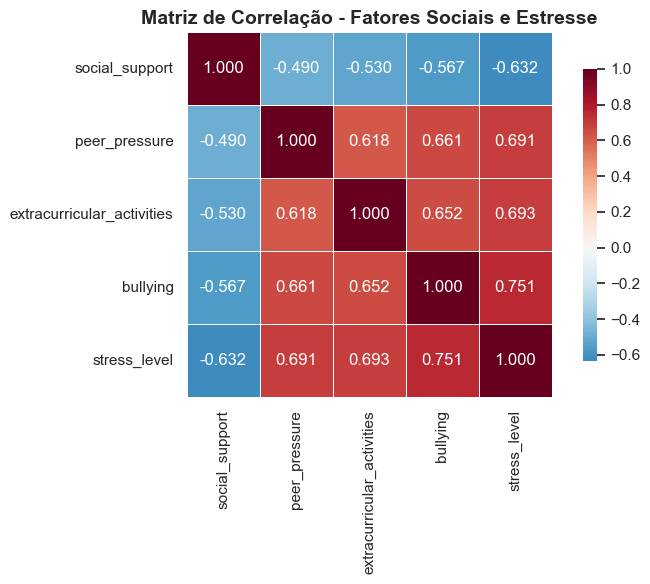

In [29]:
sns.set_theme(style="whitegrid", font_scale=1.0)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

correlation_matrix = df_social[
    [
        "social_support",
        "peer_pressure",
        "extracurricular_activities",
        "bullying",
        "stress_level",
    ]
].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    center=0,
    ax=ax,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="white",
    square=True,
)
ax.set_title(
    "Matriz de Correlação - Fatores Sociais e Estresse", fontweight="bold", fontsize=14
)

plt.tight_layout()
plt.show()

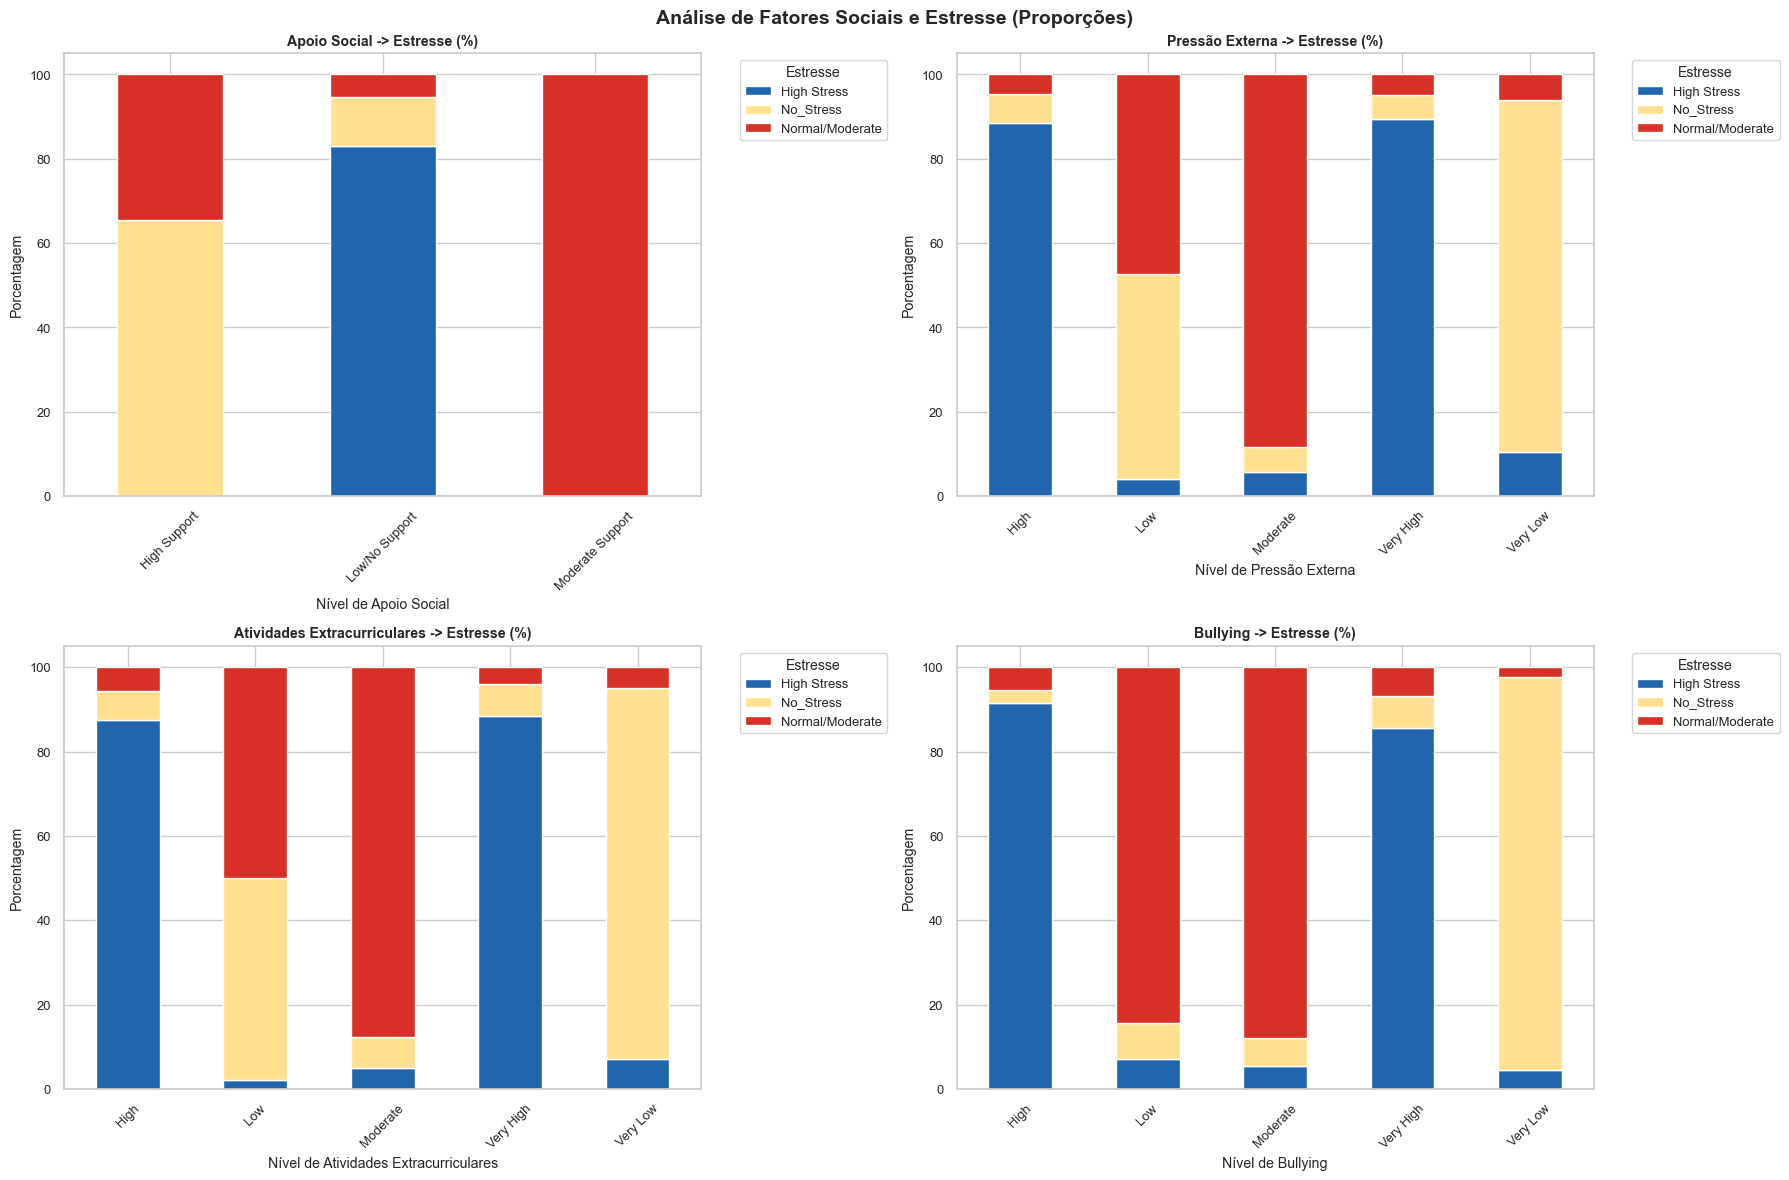

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
sns.set_theme(style="whitegrid", font_scale=0.85)

############################### Subplot 1: Apoio Social ###############################
pivot_support = (
    df_social.groupby(["social_support_category", "stress_category"], observed=True)
    .size()
    .unstack(fill_value=0)
)

pivot_support_pct = pivot_support.div(pivot_support.sum(axis=1), axis=0) * 100
pivot_support_pct.plot(
    kind="bar", stacked=True, ax=axes[0, 0], color=["#2166ac", "#fee090", "#d73027"]
)

axes[0, 0].set_title("Apoio Social -> Estresse (%)", fontweight="bold")
axes[0, 0].set_xlabel("Nível de Apoio Social")
axes[0, 0].set_ylabel("Porcentagem")
axes[0, 0].legend(title="Estresse", bbox_to_anchor=(1.05, 1))
axes[0, 0].tick_params(axis="x", rotation=45)

############################### Subplot 2: Pressão Externa ###############################
pivot_pressure = (
    df_social.groupby(["peer_pressure_category", "stress_category"], observed=True)
    .size()
    .unstack(fill_value=0)
)

pivot_pressure_pct = pivot_pressure.div(pivot_pressure.sum(axis=1), axis=0) * 100
pivot_pressure_pct.plot(
    kind="bar", stacked=True, ax=axes[0, 1], color=["#2166ac", "#fee090", "#d73027"]
)

axes[0, 1].set_title("Pressão Externa -> Estresse (%)", fontweight="bold")
axes[0, 1].set_xlabel("Nível de Pressão Externa")
axes[0, 1].set_ylabel("Porcentagem")
axes[0, 1].legend(title="Estresse", bbox_to_anchor=(1.05, 1))
axes[0, 1].tick_params(axis="x", rotation=45)

############################### Subplot 3: Atividades Extracurriculares ###############################
pivot_activities = (
    df_social.groupby(["extracurricular_category", "stress_category"], observed=True)
    .size()
    .unstack(fill_value=0)
)

pivot_activities_pct = pivot_activities.div(pivot_activities.sum(axis=1), axis=0) * 100
pivot_activities_pct.plot(
    kind="bar", stacked=True, ax=axes[1, 0], color=["#2166ac", "#fee090", "#d73027"]
)

axes[1, 0].set_title("Atividades Extracurriculares -> Estresse (%)", fontweight="bold")
axes[1, 0].set_xlabel("Nível de Atividades Extracurriculares")
axes[1, 0].set_ylabel("Porcentagem")
axes[1, 0].legend(title="Estresse", bbox_to_anchor=(1.05, 1))
axes[1, 0].tick_params(axis="x", rotation=45)

############################### Subplot 4: Bullying ###############################
pivot_bullying = (
    df_social.groupby(["bullying_category", "stress_category"], observed=True)
    .size()
    .unstack(fill_value=0)
)

pivot_bullying_pct = pivot_bullying.div(pivot_bullying.sum(axis=1), axis=0) * 100
pivot_bullying_pct.plot(
    kind="bar", stacked=True, ax=axes[1, 1], color=["#2166ac", "#fee090", "#d73027"]
)

axes[1, 1].set_title("Bullying -> Estresse (%)", fontweight="bold")
axes[1, 1].set_xlabel("Nível de Bullying")
axes[1, 1].set_ylabel("Porcentagem")
axes[1, 1].legend(title="Estresse", bbox_to_anchor=(1.05, 1))
axes[1, 1].tick_params(axis="x", rotation=45)

plt.suptitle(
    "Análise de Fatores Sociais e Estresse (Proporções)", fontsize=14, fontweight="bold"
)

plt.tight_layout()
plt.show()

### **Conclusão Final da Análise**

A jornada através dos dados chega a uma conclusão clara e poderosa. A análise inicial mostrava uma população dividida em terços quase iguais de estresse, mas os gráficos de proporções revelaram que o nível de estresse de um estudante é, em grande parte, determinado por seu **ambiente social e pelas pressões que enfrenta**, não sendo uma condição aleatória. Fatores como a pressão externa, o bullying e um volume excessivo de atividades extracurriculares emergem como os principais gatilhos, demonstrando uma relação direta onde o aumento desses elementos leva a uma probabilidade esmagadora de estresse elevado.

Em contrapartida, o **Apoio Social se confirma como o pilar fundamental do bem-estar estudantil**, quase erradicando o estresse elevado quando presente, enquanto sua ausência deixa o estudante à deriva, tornando o estresse alto praticamente uma certeza. Considerando a forte e já estabelecida ligação entre estresse elevado e quadros graves de depressão, ansiedade e histórico de saúde mental, fica evidente que estes fatores sociais não coincidências, mas sim fatores chave para a saúde mental da população estudantil. Portanto, a análise conclui que a mitigação do estresse severo entre estudantes depende menos de uma resiliência individual isolada e mais da construção de um ecossistema acadêmico seguro, com redes de apoio melhores e uma cultura que combata ativamente o bullying e a pressão social destrutiva.

- O que fazer a seguir?

Futuras análises deste dataset poderiam explorar como os principais grupos aqui apresentados se relacionam entre si, sem necessariamente pensar nos níveis de estresse, por exemplo: será que o excesso de atividades extracurriculares pode estar associado à baixa frequência dos alunos? Ou então, buscar entender como que um aluno com um quadro depressivo lida com fatores acadêmicos que não foram explorados em relação a um aluno com grande suporte social? A partir daqui, as possibilidades de análises se tornam muito mais específicas, possivelmente revelando comportamentos novos. Porém, o principal objetivo desta EDA foi cumprido, entender como o estresse afeta o desempenho acadêmico, quais suas possíveis consequências e, principalmente, quais as suas causas nos estudantes da pesquisa.